## Prepare Data

Import libraries:

In [1]:
import numpy as np
import pickle
import cv2
import tensorflow as tf
import random
import csv
import glob 
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Process Default Data

Process default data file:

In [2]:
default_csv = './default_data/driving_log.csv'
path = './default_data/'

car_images = []
steering_angles = []

# Get first track csv data
with open(default_csv) as csv_file:
    reader = csv.reader(csv_file)
    
    for row in reader:
        
        if row[3] == "steering":
            continue
            
        steering_center = float(row[3])

        # create adjusted steering measurements for the side camera images
        correction = 0.2 # this is a parameter to tune
        steering_left = steering_center + correction
        steering_right = steering_center - correction

        # read in images from center, left and right cameras
        img_center = cv2.imread(path + row[0].strip())
        img_left = cv2.imread(path + row[1].strip())
        img_right = cv2.imread(path + row[2].strip())
        
        # add images and angles to data set
        car_images.extend([img_center, img_left, img_right])
        steering_angles.extend([steering_center, steering_left, steering_right])

Save training data:

In [3]:
# Build training data set
X_train_d = np.array(car_images)
y_train_d = np.array(steering_angles)

In [ ]:
default_train_data = {"features" : X_train_d,"labels" : y_train_d}
pickle.dump(default_train_data, open( "default_train.p", "wb" ))

In [20]:
with open(csv_file, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            steering_center = float(row[3])
default_img = './default_data/IMG'
            # create adjusted steering measurements for the side camera images
            correction = 0.2 # this is a parameter to tune
            steering_left = steering_center + correction
            steering_right = steering_center - correction

            # read in images from center, left and right cameras
            path = "..." # fill in the path to your training IMG directory
            img_center = process_image(np.asarray(Image.open(path + row[0])))
            img_left = process_image(np.asarray(Image.open(path + row[1])))
            img_right = process_image(np.asarray(Image.open(path + row[2])))

            # add images and angles to data set
            car_images.extend(img_center, img_left, img_right)
            steering_angles.extend(steering_center, steering_left, steering_right)

TypeError: invalid file: <_io.TextIOWrapper name='./default_data/driving_log.csv' mode='r' encoding='ANSI_X3.4-1968'>

## Process Recorded Data

Process CSV measurements file:

In [5]:
# Tracks directories
first_track = './data/first_track'
second_track = './data/second_track'

log_file = 'driving_log.csv'
imgs_folder = 'IMG'
log_csv = []

# List used to skip some data
valid_folders = ['center_lane_1', 
                 'curves_smoothly_1_f_1', 
                 'curves_smoothly_1_f_2', 
                 'recovery_1',
                 'center_lane_2', 
                 'curves_smoothly_2_f', 
                 'recovery_2']

# Get first track csv data
for file in os.listdir(first_track):
    if file in valid_folders:
        # Build CSV path
        csv_path = "{}/{}/{}".format(first_track, file, log_file)

        # Load CSV data
        with open(csv_path) as csv_file:
            reader = csv.reader(csv_file)
            for line in reader:
                log_csv.append(line)

# Get second track csv data
for file in os.listdir(second_track):
    if file in valid_folders:
        
        # Build CSV path
        csv_path = "{}/{}/{}".format(second_track, file, log_file)

        # Load CSV data
        with open(csv_path) as csv_file:
            reader = csv.reader(csv_file)
            for line in reader:
                log_csv.append(line)

print(len(log_csv))

5315


In [6]:
images = []
measurements = []

for line in log_csv:
    # Get image path
    source_path = line[0]
    # Get image name
    file_name = source_path.split('/')[-1]
    # Change image path 
    current_path = './data/IMG/' + file_name
    # Store Image
    image = cv2.imread(current_path)
    images.append(image)
    
    # Store Steering Angle
    measurement = float(line[3])
    measurements.append(measurement)

# Build training data set
X_train = np.array(images)
y_train = np.array(measurements)

print(len(X_train))
print(len(y_train))

5315
5315


Store Training Data:

In [26]:
train_data = {"features" : X_train,"labels" : y_train}
pickle.dump(train_data, open( "train.p", "wb" ))

Loading Data:

In [2]:
with open("train.p", "rb") as train_file:
    train_data = pickle.load(train_file)
    
X_train, y_train = train_data["features"], train_data["labels"]

## Building Models

### Simplest Model Possible

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Lambda
from keras.layers import Convolution2D, MaxPooling2D, Cropping2D, Dropout
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adamax, Adadelta, Adagrad, Adam, SGD, RMSprop

Simplest Model Try Out:

In [30]:
m1 = Sequential()
m1.add(Flatten(input_shape=(160, 320, 3)))
m1.add(Dense(1))

m1.compile(loss='mse', optimizer='adam')
m1.fit(X_train, y_train, validation_split=0.2, shuffle=True)

m1.save('m1.h5')

Train on 17516 samples, validate on 4379 samples
Epoch 1/10
17516/17516 [==============================] - 20s - loss: 1633333.1567 - val_loss: 1195.7598
Epoch 2/10
17516/17516 [==============================] - 20s - loss: 2928.4181 - val_loss: 8850.5901
Epoch 3/10
17516/17516 [==============================] - 20s - loss: 154086.9365 - val_loss: 19758618.6120
Epoch 4/10
17516/17516 [==============================] - 20s - loss: 559733.1857 - val_loss: 4464.4862
Epoch 5/10
17516/17516 [==============================] - 20s - loss: 374218.4078 - val_loss: 25923.1692
Epoch 6/10
17516/17516 [==============================] - 20s - loss: 292226.3216 - val_loss: 54597.8005
Epoch 7/10
17516/17516 [==============================] - 20s - loss: 203483.8062 - val_loss: 45812.6437
Epoch 8/10
17516/17516 [==============================] - 20s - loss: 414011.9327 - val_loss: 5974.0142
Epoch 9/10
17516/17516 [==============================] - 20s - loss: 355963.7128 - val_loss: 73384.6647
Epoch 10

### Normalization

Normalize Images in Range: 0 - 1

In [28]:
m2 = Sequential()
m2.add(Lambda(lambda x: x / 255.0, input_shape=(160, 320, 3)))
m2.add(Flatten())
m2.add(Dense(1))

m2.compile(loss='mse', optimizer='adam')
m2.fit(X_train, y_train, validation_split=0.2, shuffle=True)

m2.save('m2.h5')

Train on 17516 samples, validate on 4379 samples
Epoch 1/10
17516/17516 [==============================] - 20s - loss: 25.9219 - val_loss: 0.1310
Epoch 2/10
17516/17516 [==============================] - 20s - loss: 0.1302 - val_loss: 0.1292
Epoch 3/10
17516/17516 [==============================] - 21s - loss: 3.3529 - val_loss: 0.4656
Epoch 4/10
17516/17516 [==============================] - 20s - loss: 4.8874 - val_loss: 0.1863
Epoch 5/10
17516/17516 [==============================] - 21s - loss: 7.0445 - val_loss: 0.2356
Epoch 6/10
17516/17516 [==============================] - 21s - loss: 3.0626 - val_loss: 2.8542
Epoch 7/10
17516/17516 [==============================] - 20s - loss: 5.9324 - val_loss: 7.9464
Epoch 8/10
17516/17516 [==============================] - 20s - loss: 5.2262 - val_loss: 0.7999
Epoch 9/10
17516/17516 [==============================] - 20s - loss: 5.8150 - val_loss: 0.2200
Epoch 10/10
17516/17516 [==============================] - 20s - loss: 3.7678 - val_lo

Mean Center Images:

In [31]:
m3 = Sequential()
m3.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
m3.add(Flatten())
m3.add(Dense(1))

m3.compile(loss='mse', optimizer='adam')
m3.fit(X_train, y_train, validation_split=0.2, shuffle=True)

m3.save('m3.h5')

Train on 17516 samples, validate on 4379 samples
Epoch 1/10
17516/17516 [==============================] - 21s - loss: 4.4784 - val_loss: 16.1374
Epoch 2/10
17516/17516 [==============================] - 21s - loss: 1.9974 - val_loss: 8.7859
Epoch 3/10
17516/17516 [==============================] - 21s - loss: 3.7621 - val_loss: 1.8375
Epoch 4/10
17516/17516 [==============================] - 21s - loss: 4.2360 - val_loss: 0.4352
Epoch 5/10
17516/17516 [==============================] - 21s - loss: 2.3698 - val_loss: 5.8420
Epoch 6/10
17516/17516 [==============================] - 21s - loss: 5.0843 - val_loss: 1.3734
Epoch 7/10
17516/17516 [==============================] - 21s - loss: 1.8498 - val_loss: 7.1161
Epoch 8/10
17516/17516 [==============================] - 21s - loss: 3.4522 - val_loss: 4.0788s: 3.454
Epoch 9/10
17516/17516 [==============================] - 21s - loss: 3.1270 - val_loss: 2.9286
Epoch 10/10
17516/17516 [==============================] - 21s - loss: 1.5077 

### LeNet Model

![](https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/lenet-5.png?x64257)
![](http://gpucomputing.shef.ac.uk/static/img/intro_dl_sharc_dgx1/mnist_lenet.jpg)

In [33]:
lenet = Sequential()
lenet.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
lenet.add(Convolution2D(6, 5, 5, activation='relu'))
lenet.add(MaxPooling2D())
lenet.add(Convolution2D(6, 5, 5, activation='relu'))
lenet.add(MaxPooling2D())
lenet.add(Flatten())
lenet.add(Dense(120))
lenet.add(Dense(84))
lenet.add(Dense(1))


lenet.compile(loss='mse', optimizer='adam')
lenet.fit(X_train, y_train, validation_split=0.2, shuffle=True)

lenet.save('lenet.h5')

Train on 17516 samples, validate on 4379 samples
Epoch 1/10
17516/17516 [==============================] - 66s - loss: 0.3390 - val_loss: 0.1133
Epoch 2/10
17516/17516 [==============================] - 65s - loss: 0.0586 - val_loss: 0.0957
Epoch 3/10
17516/17516 [==============================] - 65s - loss: 0.0502 - val_loss: 0.0912
Epoch 4/10
17516/17516 [==============================] - 65s - loss: 0.0442 - val_loss: 0.0899
Epoch 5/10
17516/17516 [==============================] - 65s - loss: 0.0402 - val_loss: 0.1125
Epoch 6/10
17516/17516 [==============================] - 65s - loss: 0.0353 - val_loss: 0.0995
Epoch 7/10
17516/17516 [==============================] - 65s - loss: 0.0329 - val_loss: 0.0930
Epoch 8/10
17516/17516 [==============================] - 65s - loss: 0.0302 - val_loss: 0.1046
Epoch 9/10
17516/17516 [==============================] - 65s - loss: 0.0279 - val_loss: 0.0930
Epoch 10/10
17516/17516 [==============================] - 65s - loss: 0.0252 - val_los

## Image Augmentation

Flipping Images Vertically

In [4]:
X_aug, y_aug = [], []

for X, y in zip(X_train_d, y_train_d):
    X_aug.append(X)
    y_aug.append(y)
    X_aug.append(cv2.flip(X, 1))
    y_aug.append(y * -1.0)

In [6]:
X_aug, y_aug = np.array(X_aug), np.array(y_aug)

MemoryError: 

Store Augmented Data

In [9]:
aug_data = {"features" : X_aug,"labels" : y_aug}
pickle.dump(aug_data, open( "train_aug.p", "wb" ))

(43790, 160, 320, 3)


In [14]:
lenet_aug = Sequential()
lenet_aug.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))
lenet_aug.add(Lambda(lambda x: x / 255.0 - 0.5))
lenet_aug.add(Convolution2D(6, 5, 5, activation='relu'))
lenet_aug.add(MaxPooling2D())
lenet_aug.add(Convolution2D(6, 5, 5, activation='relu'))
lenet_aug.add(MaxPooling2D())
lenet_aug.add(Flatten())
lenet_aug.add(Dense(120))
lenet_aug.add(Dense(84))
lenet_aug.add(Dense(1))

lenet_aug.compile(loss='mse', optimizer='adam')
lenet_aug.fit(X_train_d, y_train_d, validation_split=0.2, shuffle=True)

lenet_aug.save('lenet_default_train.h5')

Train on 19286 samples, validate on 4822 samples
Epoch 1/10
19286/19286 [==============================] - 49s - loss: 0.0682 - val_loss: 0.0214
Epoch 2/10
19286/19286 [==============================] - 46s - loss: 0.0142 - val_loss: 0.0208
Epoch 3/10
19286/19286 [==============================] - 46s - loss: 0.0119 - val_loss: 0.0187
Epoch 4/10
19286/19286 [==============================] - 46s - loss: 0.0106 - val_loss: 0.0180
Epoch 5/10
19286/19286 [==============================] - 46s - loss: 0.0098 - val_loss: 0.0195
Epoch 6/10
19286/19286 [==============================] - 46s - loss: 0.0090 - val_loss: 0.0175
Epoch 7/10
19286/19286 [==============================] - 46s - loss: 0.0086 - val_loss: 0.0184
Epoch 8/10
19286/19286 [==============================] - 47s - loss: 0.0083 - val_loss: 0.0184
Epoch 9/10
19286/19286 [==============================] - 46s - loss: 0.0081 - val_loss: 0.0190
Epoch 10/10
19286/19286 [==============================] - 46s - loss: 0.0077 - val_los

## Nvidia End to End Model

<img src="https://devblogs.nvidia.com/parallelforall/wp-content/uploads/2016/08/cnn-architecture.png" alt="Nvidia Network" style="width: 500px;"/>

In [33]:
nvidia = Sequential()
nvidia.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))
nvidia.add(Cropping2D(cropping=((70,25), (0,0))))
nvidia.add(Convolution2D(24, 5, 5, subsample=(2, 2), activation='relu'))
nvidia.add(Dropout(0.5))
nvidia.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
nvidia.add(Dropout(0.5))
nvidia.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
nvidia.add(Dropout(0.5))
nvidia.add(Convolution2D(64, 3, 3, activation='relu'))
nvidia.add(Dropout(0.5))
nvidia.add(Convolution2D(64, 3, 3, activation='relu'))
nvidia.add(Dropout(0.5))
nvidia.add(Flatten())
nvidia.add(Dense(100))
nvidia.add(Dropout(0.5))
nvidia.add(Dense(50))
nvidia.add(Dropout(0.5))
nvidia.add(Dense(10))
nvidia.add(Dense(1))

# Adamax, Adadelta, Adagrad, Adam, SGD, RMSprop
opt = Adam(lr=0.005, beta_1=0.9, beta_2=0.999)

nvidia.compile(loss='mse', optimizer=opt,  metrics=['accuracy'])

filepath="nividia-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = nvidia.fit(X_train_d, y_train_d, validation_split=0.2, batch_size=128, nb_epoch=5, callbacks=callbacks_list, shuffle=True)

nvidia.save('nvidia_model.h5')

Train on 19286 samples, validate on 4822 samples
Epoch 1/5
19286/19286 [==============================] - 69s - loss: 0.0447 - acc: 0.1799 - val_loss: 0.0442 - val_acc: 0.1837
Epoch 2/5
19286/19286 [==============================] - 41s - loss: 0.0356 - acc: 0.1798 - val_loss: 0.0317 - val_acc: 0.1837
Epoch 3/5
19286/19286 [==============================] - 41s - loss: 0.0284 - acc: 0.1800 - val_loss: 0.0310 - val_acc: 0.1837
Epoch 4/5
19286/19286 [==============================] - 41s - loss: 0.0243 - acc: 0.1799 - val_loss: 0.0237 - val_acc: 0.1837
Epoch 5/5
19286/19286 [==============================] - 41s - loss: 0.0226 - acc: 0.1801 - val_loss: 0.0213 - val_acc: 0.1837


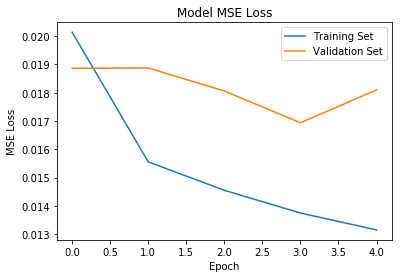

In [28]:
### plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')
plt.show()

In [54]:
import os
import csv
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

samples = []
with open('./default_data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

train_samples, validation_samples = train_test_split(samples, test_size=0.2)

import cv2
import numpy as np
import sklearn

def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            
            for batch_sample in batch_samples:
                
                center_name = './default_data/IMG/' + batch_sample[0].split('/')[-1].strip()
                left_name = './default_data/IMG/' + batch_sample[1].split('/')[-1].strip()
                right_name = './default_data/IMG/'+ batch_sample[1].split('/')[-1].strip()
                
                # read in images from left and right cameras
                center_image = cv2.imread(center_name)
                left_image = cv2.imread(left_name)
                right_image = cv2.imread(right_name)
                
                center_angle = float(batch_sample[3])
                
                # create adjusted steering measurements for the side camera images
                correction = 0.2 # this is a parameter to tune
                left_angle = center_angle + correction
                right_angle = center_angle - correction
                
                images.append(center_image)
                angles.append(center_angle)
                images.append(left_image)
                angles.append(left_angle)
                images.append(right_image)
                angles.append(right_angle)
                
            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            
            yield shuffle(X_train, y_train)

In [ ]:
# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=32)
validation_generator = generator(validation_samples, batch_size=32)

ngen = Sequential()
ngen.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))
ngen.add(Cropping2D(cropping=((70,25), (0,0))))
ngen.add(Convolution2D(24, 5, 5, subsample=(2, 2), activation='relu'))
ngen.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
ngen.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
ngen.add(Convolution2D(64, 3, 3, activation='relu'))
ngen.add(Convolution2D(64, 3, 3, activation='relu'))
ngen.add(Flatten())
ngen.add(Dense(100))
ngen.add(Dense(50))
ngen.add(Dense(10))
ngen.add(Dense(1))

ngen.compile(loss='mse', optimizer='adam',  metrics=['accuracy'])

filepath="ngen-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

nvidia.fit_generator(train_generator, 
                     samples_per_epoch=len(train_samples) * 3, 
                     validation_data=validation_generator, 
                     nb_val_samples=len(validation_samples) * 3, 
                     nb_epoch=3)

nvidia.save('ngen_model.h5')

Epoch 1/3
14016/19284 [====================>.........] - ETA: 10s - loss: 0.0411 - acc: 0.1807